# Decoupling test

In [2]:
###Imports###
%matplotlib notebook

import numpy as np
import mpmath as mp
mp.dps = 15; mp.pretty = True
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import random

In [3]:
N_0 = 6.02214 * 10**23 #Total number of site, avagadro's number
k_B = 1.38064852 * 10**-23 #Boltzmann constant

In [126]:
def double_monopole(start_mu, coupling, start_T, num_T, T_max, tol, limit):

    mu_0 = 4 * np.pi * 10**-7 #vacuum permeability
    a = 4.34 * 10**-10 #lattice spacing of diamond lattice
    Q = 4.28 * 10**-13 #magnetic charge
    vol_per_site = ((10.1**3)/8) * 10**-30
    N_0 = 6.02214 * 10**23 #Total number of site, avagadro's number
    k_B = 1.38064852 * 10**-23 #Boltzmann constant
    T = start_T #Temperature in Kelvins (parameter)
    
    ##array initialisation##
    #TempArray_double = []
    TempArray_double = np.geomspace(start_T, T_max, num=num_T)
    SpecHeatArray_double = []
    EntropyArray = []
    muDoubleArray = []
    mu2DoubleArray = []
    nArray = []
    n_2Array = []
    internalEnergyArray = []
    
    j=0 #variable to cycle through elements of TempArray
    
    #while T <= T_max :
    while j < num_T :
        
        i = 0
        old_mu = 0
        new_mu = -start_mu * k_B
        init_mu = -start_mu * k_B
        old_mu_2 = 0
        new_mu_2 = -start_mu * coupling * k_B
        init_mu_2 = -start_mu * coupling * k_B
        beta = 1/(k_B * T)
        l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi)
        #print("Temperature:", T)
        
        
        while np.abs((new_mu - old_mu)/new_mu) > tol and i < limit :
            #print("new mu:", new_mu)
            old_mu = new_mu #if new and old values not close enough, new replaces old
            old_mu_2 = new_mu_2
            #new number of monopoles
            n = (4/3 * np.exp(beta * old_mu))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu) + np.exp(beta * old_mu_2))))
            n_2 = (1/3 * np.exp(beta * old_mu_2))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu) + np.exp(beta * old_mu_2))))
            #print("n:", n)
            
            #calculating new Debye length
            #rho = n/vol_per_site
            #rho_2 = n_2/vol_per_site
            
            if i == 0:
                rho = 0/vol_per_site
                rho_2 = 1/vol_per_site
                
            else:
                rho = n/vol_per_site
                rho_2 = n_2/vol_per_site
                
            rho_I = rho + 4*rho_2
            #print("rho:", rho)
            
            l_D = np.sqrt((k_B * T)/(Q * Q * rho_I * mu_0)) #Debye length Calc
            #print("l_D: ", l_D)
            #print("l_T:", l_T)
            
            deltaDH = k_B * T * ((l_T)/(l_D + a))
            new_mu = init_mu + deltaDH
            new_mu_2 = init_mu_2 + 4*deltaDH
            #print("deltaDH:",deltaDH)
            #print("mu:", new_mu)
            #print("mu_2:", new_mu_2)
            #print(old_mu)
            #print(np.abs(new_mu - old_mu))
            #print("")
            
            i += 1
            if i==limit:
                print('Warning: Monopole density did not converge after', limit, 'iterations!')
                # This stops the function running forever if there is a problem with convergence.
        
        ##Calculates the differential of monopole density n wit respect to Temperature, used to calculate specific heat
        #differential = mp.diff(lambda t:((4/3 * mp.exp((1/(k_B * t)) * old_mu))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * old_mu) + mp.exp((1/(k_B * t)) * old_mu_2) )))), T)
        #differential_2 = mp.diff(lambda t:((1/3 * mp.exp((1/(k_B * t)) * old_mu_2))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * old_mu) + mp.exp((1/(k_B * t)) * old_mu_2) )))), T)
        
        differential = mp.diff(lambda t:((1/3 * 4 * mp.exp((1/(k_B * t)) * (init_mu + k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a))) ))/(1 +(1/3 * ( (4 * mp.exp((1/(k_B * t)) * (init_mu + k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a))))) + mp.exp((1/(k_B * t)) * (init_mu_2 + coupling * k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a)))) ) ))), T)
        differential_2 = mp.diff(lambda t:((1/3 * mp.exp((1/(k_B * t)) * (init_mu_2 + coupling * k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a)))))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * (init_mu + k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a)))) + mp.exp((1/(k_B * t)) * (init_mu_2 + coupling * k_B * t * (((mu_0 * Q * Q)/(k_B * t * 8 * mp.pi))/((mp.sqrt((k_B * t)/(Q * Q * rho_I * mu_0))) + a)))) )))), T)
        
        SpecHeatVal = - N_0 * (new_mu * float(differential) + new_mu_2 * float(differential_2))
        #print("differential of n wrt T:", differential)
        #print("differential of n_2 wrt T:", differential_2)
        #print("Specific Heat Value:", SpecHeatVal)
        
        Entropy = - k_B * N_0 *( (n*np.log(n/2) + (n_2*np.log(2*n_2) + ((1-n-n_2)*np.log(1-n-n_2)) + ((1-n-n_2)*np.log(2/3)) ) ) )
        #Entropy_corrected = Entropy - (8.314 * 1/2*np.log(3/2))
        
        internalEnergyTerm = np.log(1+(a/l_D)) - (a/l_D) + 1/2*((a/l_D)**2)
        #internalEnergyTerm = np.log(1+(a/np.sqrt((k_B*T)/(Q*Q*n/vol_per_site*mu_0)))) - (a/np.sqrt((k_B*T)/(Q * Q * n/vol_per_site * mu_0))) + 1/2*((a/np.sqrt((k_B * T)/(Q * Q * n/vol_per_site * mu_0)))**2)
        internalEnergy = - ((4 * N_0 * k_B * T)/(6*np.pi*np.sqrt(3))) * internalEnergyTerm
        
        nArray = np.append(nArray, n)
        n_2Array = np.append(n_2Array, n_2)
        muDoubleArray = np.append(muDoubleArray, new_mu)
        mu2DoubleArray = np.append(mu2DoubleArray, new_mu_2)
        EntropyArray = np.append(EntropyArray, Entropy)
        internalEnergyArray = np.append(internalEnergyArray, internalEnergy)
        #TempArray_double = np.append(TempArray_double, T)
        SpecHeatArray_double = np.append(SpecHeatArray_double, SpecHeatVal)
        
        #T += T_step
        
        j += 1
        if j < num_T :
            T = TempArray_double[j]
        #print("done")
        
    ##numerical calculation of entropy, omega##
    DiffNumerical = np.gradient(nArray, TempArray_double)
    DiffNumerical_2 = np.gradient(n_2Array, TempArray_double)
    SpecHeatNumerical = - 1/2 * N_0 * (muDoubleArray * DiffNumerical + mu2DoubleArray * DiffNumerical_2)

    DeltaS = cumtrapz((SpecHeatNumerical)/TempArray_double, TempArray_double)
    DeltaS = np.insert(DeltaS,0,0, axis=0) #inserts a 0 in 0th element to match other arrays' sizes
    EntropyTotalArray = DeltaS + (N_0*1/2 * k_B *np.log(3/2))

    Omega = internalEnergyArray - (init_mu * (N_0*nArray)) - (init_mu_2 * (N_0*n_2Array)) - (TempArray_double*EntropyTotalArray)
        
    print("")
    print("final")
    #print("Temperature values:", TempArray_double)
    #print("Specific Heat array:", SpecHeatArray_double)
    return (TempArray_double, SpecHeatArray_double, EntropyArray, muDoubleArray, mu2DoubleArray, nArray, n_2Array, SpecHeatNumerical, EntropyTotalArray, Omega)

In [132]:
###0.50 mu_1 values, double monopole###
TempArray_double1, SpecHeatArray_double1, EntropyArray_double1, muDoubleArray1, mu2DoubleArray1, nArray_double1, n_2Array_double1, SpecHeatNumerical_double1, EntropyTotalArray_double1, Omega_double1 = double_monopole(0.50, 4, 0.01, 1000, 30, 1e-4, 1000)

###0.75 mu_1 values, double monopole###
TempArray_double9, SpecHeatArray_double9, EntropyArray_double9, muDoubleArray9, mu2DoubleArray9, nArray_double9, n_2Array_double9, SpecHeatNumerical_double9, EntropyTotalArray_double9, Omega_double9 = double_monopole(0.75, 4, 0.01, 1000, 30, 1e-4, 1000)

###1.00 mu_1 values, double monopole###
TempArray_double2, SpecHeatArray_double2, EntropyArray_double2, muDoubleArray2, mu2DoubleArray2, nArray_double2, n_2Array_double2, SpecHeatNumerical_double2, EntropyTotalArray_double2, Omega_double2 = double_monopole(1.00, 4, 0.01, 1000, 30, 1e-4, 1000)

###1.15 mu_1 values, double monopole###
TempArray_double3, SpecHeatArray_double3, EntropyArray_double3, muDoubleArray3, mu2DoubleArray3, nArray_double3, n_2Array_double3, SpecHeatNumerical_double3, EntropyTotalArray_double3, Omega_double3 = double_monopole(1.15, 4, 0.01, 1000, 30, 1e-4, 1000)

###1.30 mu_1 values, double monopole###7
TempArray_double4, SpecHeatArray_double4, EntropyArray_double4, muDoubleArray4, mu2DoubleArray4, nArray_double4, n_2Array_double4, SpecHeatNumerical_double4, EntropyTotalArray_double4, Omega_double4 = double_monopole(1.30, 4, 0.01, 1000, 30, 1e-4, 1000)

###1.57 mu_1 values, double monopole###
TempArray_double5, SpecHeatArray_double5, EntropyArray_double5, muDoubleArray5, mu2DoubleArray5, nArray_double5, n_2Array_double5, SpecHeatNumerical_double5, EntropyTotalArray_double5, Omega_double5 = double_monopole(1.57, 4, 0.01, 1000, 30, 1e-4, 1000)

###1.90 mu_1 values, double monopole###
TempArray_double6, SpecHeatArray_double6, EntropyArray_double6, muDoubleArray6, mu2DoubleArray6, nArray_double6, n_2Array_double6, SpecHeatNumerical_double6, EntropyTotalArray_double6, Omega_double6 = double_monopole(1.90, 4, 0.01, 1000, 30, 1e-4, 1000)

###2.50 mu_1 values, double monopole###
TempArray_double7, SpecHeatArray_double7, EntropyArray_double7, muDoubleArray7, mu2DoubleArray7, nArray_double7, n_2Array_double7, SpecHeatNumerical_double7, EntropyTotalArray_double7, Omega_double7 = double_monopole(2.50, 4, 0.01, 1000, 30, 1e-4, 1000)

###4.35 mu_1 values, double monopole###
TempArray_double8, SpecHeatArray_double8, EntropyArray_double8, muDoubleArray8, mu2DoubleArray8, nArray_double8, n_2Array_double8, SpecHeatNumerical_double8, EntropyTotalArray_double8, Omega_double8 = double_monopole(4.35, 4, 0.01, 1000, 30, 1e-4, 1000)


C:\Users\Omar3\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\Omar3\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Omar3\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log



final

final

final

final

final

final

final

final

final


<IPython.core.display.Javascript object>


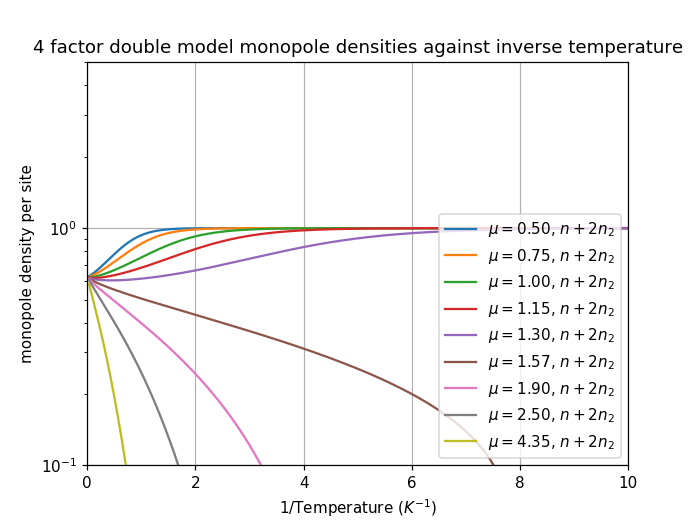

In [140]:
###monopole density against temperature###
graph1= plt.figure()
plt.grid(True)

plt.plot(1/TempArray_double1, nArray_double1 + n_2Array_double1, '-', label="$\mu=0.50$, $n+2n_2$")
plt.plot(1/TempArray_double9, nArray_double9 + n_2Array_double9, '-', label="$\mu=0.75$, $n+2n_2$")
plt.plot(1/TempArray_double2, nArray_double2 + n_2Array_double2, '-', label="$\mu=1.00$, $n+2n_2$")
plt.plot(1/TempArray_double3, nArray_double3 + n_2Array_double3, '-', label="$\mu=1.15$, $n+2n_2$")
plt.plot(1/TempArray_double4, nArray_double4 + n_2Array_double4, '-', label="$\mu=1.30$, $n+2n_2$")
plt.plot(1/TempArray_double5, nArray_double5 + n_2Array_double5, '-', label="$\mu=1.57$, $n+2n_2$")
plt.plot(1/TempArray_double6, nArray_double6 + n_2Array_double6, '-', label="$\mu=1.90$, $n+2n_2$")
plt.plot(1/TempArray_double7, nArray_double7 + n_2Array_double7, '-', label="$\mu=2.50$, $n+2n_2$")
plt.plot(1/TempArray_double8, nArray_double8 + n_2Array_double8, '-', label="$\mu=4.35$, $n+2n_2$")

plt.xlabel("1/Temperature ($K^{-1}$)")
plt.ylabel("monopole density per site")
plt.yscale('log')
#plt.ylim(0.175,0.275)
#plt.xlim(6, 6.6)
#plt.ylim(10**-4,1)
#plt.xlim(0,80)
plt.ylim(10**-1, 5)
plt.xlim(0,10)
plt.title("4 factor double model monopole densities against inverse temperature")
plt.legend(loc='lower right')
#plt.savefig('monopole densities against inverse temperature double model 9p75 factor lim.png')

<IPython.core.display.Javascript object>


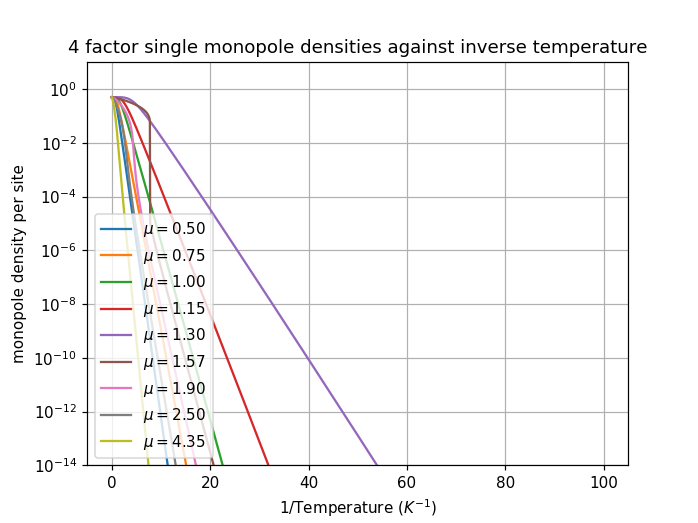

In [134]:
###monopole density against temperature###
graph1= plt.figure()
plt.grid(True)

plt.plot(1/TempArray_double1, nArray_double1 , '-', label="$\mu=0.50$")
plt.plot(1/TempArray_double9, nArray_double9 , '-', label="$\mu=0.75$")
plt.plot(1/TempArray_double2, nArray_double2 , '-', label="$\mu=1.00$")
plt.plot(1/TempArray_double3, nArray_double3 , '-', label="$\mu=1.15$")
plt.plot(1/TempArray_double4, nArray_double4 , '-', label="$\mu=1.30$")
plt.plot(1/TempArray_double5, nArray_double5 , '-', label="$\mu=1.57$")
plt.plot(1/TempArray_double6, nArray_double6 , '-', label="$\mu=1.90$")
plt.plot(1/TempArray_double7, nArray_double7 , '-', label="$\mu=2.50$")
plt.plot(1/TempArray_double8, nArray_double8 , '-', label="$\mu=4.35$")

plt.xlabel("1/Temperature ($K^{-1}$)")
plt.ylabel("monopole density per site")
plt.yscale('log')
#plt.ylim(0.175,0.275)
#plt.xlim(6, 6.6)
#plt.ylim(10**-4,1)
#plt.xlim(0,80)
plt.ylim(10**-14, 10)
plt.title("4 factor single monopole densities against inverse temperature")
plt.legend(loc='lower left')
#plt.savefig('9p75 factor single monopole densities inverse temp.png')

<IPython.core.display.Javascript object>


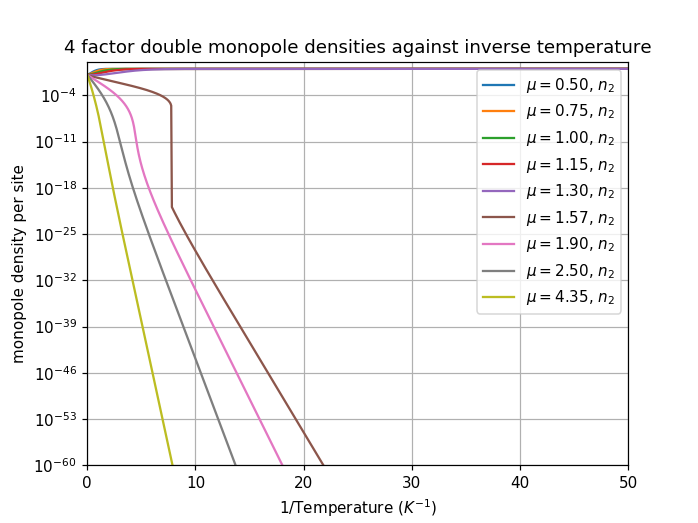

In [135]:
graph1= plt.figure()
plt.grid(True)

plt.plot(1/TempArray_double1, n_2Array_double1, '-', label="$\mu=0.50$, $n_2$")
plt.plot(1/TempArray_double9, n_2Array_double9, '-', label="$\mu=0.75$, $n_2$")
plt.plot(1/TempArray_double2, n_2Array_double2, '-', label="$\mu=1.00$, $n_2$")
plt.plot(1/TempArray_double3, n_2Array_double3, '-', label="$\mu=1.15$, $n_2$")
plt.plot(1/TempArray_double4, n_2Array_double4, '-', label="$\mu=1.30$, $n_2$")
plt.plot(1/TempArray_double5, n_2Array_double5, '-', label="$\mu=1.57$, $n_2$")
plt.plot(1/TempArray_double6, n_2Array_double6, '-', label="$\mu=1.90$, $n_2$")
plt.plot(1/TempArray_double7, n_2Array_double7, '-', label="$\mu=2.50$, $n_2$")
plt.plot(1/TempArray_double8, n_2Array_double8, '-', label="$\mu=4.35$, $n_2$")

plt.xlabel("1/Temperature ($K^{-1}$)")
plt.ylabel("monopole density per site")
plt.yscale('log')
#plt.ylim(0.175,0.275)
#plt.xlim(6, 6.6)
#plt.ylim(10**-4,1)
plt.xlim(0,50)
plt.ylim(10**-60, 10)
plt.title("4 factor double monopole densities against inverse temperature")
plt.legend(loc='upper right')
#plt.savefig('9p75 factor double monopole densities inverse temp.png')

<IPython.core.display.Javascript object>


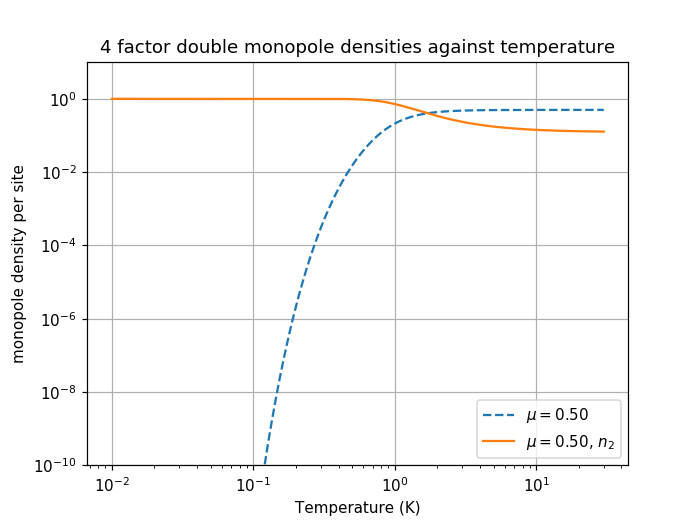

In [136]:
graph1= plt.figure()
plt.grid(True)

plt.plot(TempArray_double1, nArray_double1 , '--', label="$\mu=0.50$")
plt.plot(TempArray_double1, n_2Array_double1, '-', label="$\mu=0.50$, $n_2$")


plt.xlabel("Temperature (K)")
plt.ylabel("monopole density per site")
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.175,0.275)
#plt.xlim(6, 6.6)
#plt.ylim(10**-4,1)
#plt.xlim(0,35)
plt.ylim(10**-10, 10)
plt.title("4 factor double monopole densities against temperature")
plt.legend(loc='lower right')
#plt.savefig('9p75 factor monopole comparison.png')

<IPython.core.display.Javascript object>


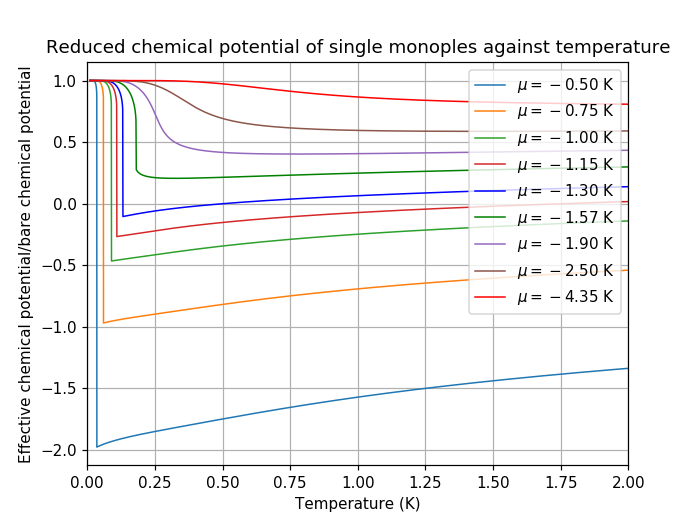

In [12]:
###corrected chemical potential aginst temperature single monopoles###
graph1 = plt.figure()
plt.grid(True)


plt.plot(TempArray_double1, muDoubleArray1/((k_B)*-0.50), '-', linewidth=1, label="$\mu=-0.50$ K")
plt.plot(TempArray_double9, muDoubleArray9/((k_B)*-0.75), '-', linewidth=1, label="$\mu=-0.75$ K")
plt.plot(TempArray_double2, muDoubleArray2/((k_B)*-1.00), '-', linewidth=1, label="$\mu=-1.00$ K")
plt.plot(TempArray_double3, muDoubleArray3/((k_B)*-1.15), '-', linewidth=1, label="$\mu=-1.15$ K")
plt.plot(TempArray_double4, muDoubleArray4/((k_B)*-1.30), 'b-', linewidth=1, label="$\mu=-1.30$ K")
plt.plot(TempArray_double5, muDoubleArray5/((k_B)*-1.57), 'g-', linewidth=1, label="$\mu=-1.57$ K")
plt.plot(TempArray_double6, muDoubleArray6/((k_B)*-1.90), '-', linewidth=1, label="$\mu=-1.90$ K")
plt.plot(TempArray_double7, muDoubleArray7/((k_B)*-2.50), '-', linewidth=1, label="$\mu=-2.50$ K")
plt.plot(TempArray_double8, muDoubleArray8/((k_B)*-4.35), 'r-', linewidth=1, label="$\mu=-4.35$ K")

plt.xlabel("Temperature (K)")
plt.ylabel("Effective chemical potential/bare chemical potential")
#plt.yscale('log')
plt.xlim(0,2.0)
#plt.ylim(0, 0.6)
plt.title("Reduced chemical potential of single monoples against temperature")
plt.legend(loc='upper right')
#plt.savefig("Reduced chemical potential for single monopoles against temperature.png")

<IPython.core.display.Javascript object>


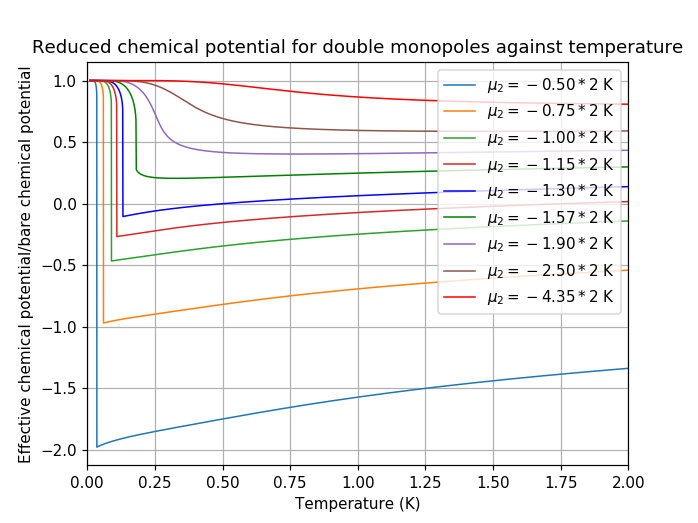

In [14]:
###corrected chemical potential aginst temperature single monopoles###
graph1 = plt.figure()
plt.grid(True)

plt.plot(TempArray_double1, mu2DoubleArray1/((k_B)*2*-0.50), '-', linewidth=1, label="$\mu_2=-0.50*2$ K")
plt.plot(TempArray_double9, mu2DoubleArray9/((k_B)*2*-0.75), '-', linewidth=1, label="$\mu_2=-0.75*2$ K")
plt.plot(TempArray_double2, mu2DoubleArray2/((k_B)*2*-1.00), '-', linewidth=1, label="$\mu_2=-1.00*2$ K")
plt.plot(TempArray_double3, mu2DoubleArray3/((k_B)*2*-1.15), '-', linewidth=1, label="$\mu_2=-1.15*2$ K")
plt.plot(TempArray_double4, mu2DoubleArray4/((k_B)*2*-1.30), 'b-', linewidth=1, label="$\mu_2=-1.30*2$ K")
plt.plot(TempArray_double5, mu2DoubleArray5/((k_B)*2*-1.57), 'g-', linewidth=1, label="$\mu_2=-1.57*2$ K")
plt.plot(TempArray_double6, mu2DoubleArray6/((k_B)*2*-1.90), '-', linewidth=1, label="$\mu_2=-1.90*2$ K")
plt.plot(TempArray_double7, mu2DoubleArray7/((k_B)*2*-2.50), '-', linewidth=1, label="$\mu_2=-2.50*2$ K")
plt.plot(TempArray_double8, mu2DoubleArray8/((k_B)*2*-4.35), 'r-', linewidth=1, label="$\mu_2=-4.35*2$ K")

plt.xlabel("Temperature (K)")
plt.ylabel("Effective chemical potential/bare chemical potential")
#plt.yscale('log')
plt.xlim(0,2)
#plt.ylim(0, 3)
plt.title("Reduced chemical potential for double monopoles against temperature")
plt.legend(loc='upper right')
#plt.savefig("Reduced chemical potential for double monopoles against temperature.png")